In [7]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Download required NLTK resources (Only once)
nltk.download('stopwords')
nltk.download('punkt')

# Load stopwords for efficiency
stop_words = set(stopwords.words('english'))

# Load dataset (Assuming it's a CSV file with 'text' and 'label' columns)
df = pd.read_csv("twitterNews.csv", encoding="ISO-8859-1")

# Define tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# Data Cleaning Function
def preprocess_text(text):
    if isinstance(text, str):  # Ensure the text is a string
        text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
        text = re.sub(r'\@w+|\#', '', text)  # Remove mentions and hashtags
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = text.lower()  # Convert to lowercase

        # Tokenization and remove stopwords
        tokens = tokenizer.tokenize(text)  # Tokenization
        tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords

        # Stemming
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(word) for word in tokens]  # Stemming
        return " ".join(tokens)
    else:
        return ""  # Return empty string for non-string values

# Apply preprocessing
df['clean_text'] = df['text'].apply(preprocess_text)

# Encode labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['label'], test_size=0.2, random_state=42)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Token Statistics:
count    3790.000000
mean       40.569393
std        13.784807
min         2.000000
25%        30.000000
50%        42.000000
75%        51.000000
max        80.000000
Name: tweet_length, dtype: float64


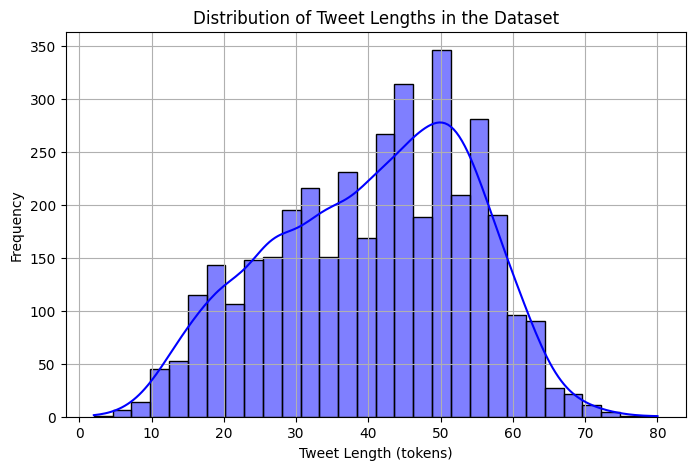

Most Common Unigrams: [('#', 7855), ('.', 4756), ('the', 4247), ('to', 3730), (',', 3520), ('?', 2592), ('and', 2445), (':', 2403), ('of', 2058), ('in', 1834)]
Most Common Bigrams: [('https :', 1816), ('# covid_19', 1540), ('# coronavirus', 1343), ('? ?', 985), ('. #', 866), ('grocery store', 671), ('covid_19 #', 636), ('& amp', 547), ('amp ;', 547), ('coronavirus #', 545)]
Most Common Trigrams: [('# covid_19 #', 636), ('? ? ?', 576), ('& amp ;', 547), ('# coronavirus #', 542), ('the grocery store', 344), ('. # covid_19', 298), ('stock up on', 296), ('. https :', 225), ('# covid_19 https', 195), ('covid_19 https :', 195)]
Most Common Hashtags: [('Covid_19', 1452), ('coronavirus', 1097), ('COVID19', 258), ('CoronavirusPandemic', 218), ('Coronavirus', 178), ('COVID2019', 174), ('CoronaOutbreak', 158), ('COVID', 146), ('coronapocalypse', 135), ('panicbuying', 109)]
Most Common Mentions: [('realDonaldTrump', 33), ('sainsburys', 16), ('amazon', 11), ('Tesco', 10), ('Walmart', 10), ('POTUS',

<ipython-input-38-38a89e1abbf7>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['label'], palette='coolwarm')


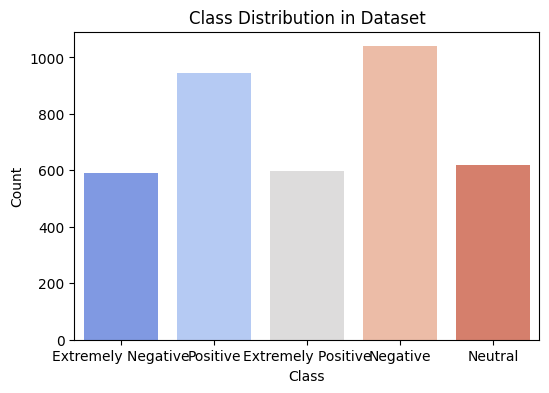

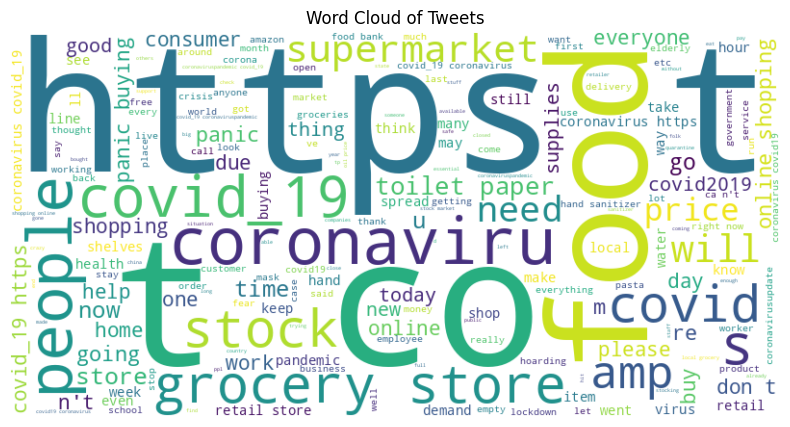

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from wordcloud import WordCloud
import nltk
import shutil
import os

# Ensure 'punkt_tab' is downloaded
nltk.download('punkt_tab')

# Step 1: Remove any existing punkt directories
punkt_path = "/usr/local/share/nltk_data/tokenizers/punkt"
if os.path.exists(punkt_path):
    shutil.rmtree(punkt_path)

# Step 2: Redownload punkt
nltk.download('punkt')

# Load dataset
df = pd.read_csv('twitterNews.csv')  # Update path if necessary

# Tokenize tweets
def tokenize(text):
    return word_tokenize(str(text).lower())

df['tokens'] = df['text'].apply(tokenize)

# Token Distribution
df['tweet_length'] = df['tokens'].apply(len)
print("Token Statistics:")
print(df['tweet_length'].describe())

# Plot Tweet Length Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['tweet_length'], bins=30, kde=True, color='blue')
plt.xlabel("Tweet Length (tokens)")
plt.ylabel("Frequency")
plt.title("Distribution of Tweet Lengths in the Dataset")
plt.grid()
plt.show()

# Frequent Terms (Unigrams, Bigrams, Trigrams)
def get_ngrams(token_list, n=1):
    return [' '.join(gram) for gram in ngrams(token_list, n)]

all_tokens = [token for tokens in df['tokens'] for token in tokens]

# Compute n-grams
unigram_counts = Counter(get_ngrams(all_tokens, 1))
bigram_counts = Counter(get_ngrams(all_tokens, 2))
trigram_counts = Counter(get_ngrams(all_tokens, 3))

# Display top 10
print("Most Common Unigrams:", unigram_counts.most_common(10))
print("Most Common Bigrams:", bigram_counts.most_common(10))
print("Most Common Trigrams:", trigram_counts.most_common(10))

# Hashtags and Mentions
def extract_hashtags_mentions(text):
    hashtags = re.findall(r"#(\w+)", text)
    mentions = re.findall(r"@(\w+)", text)
    return hashtags, mentions

df['hashtags'], df['mentions'] = zip(*df['text'].apply(extract_hashtags_mentions))

# Flatten lists
all_hashtags = [tag for tags in df['hashtags'] for tag in tags]
all_mentions = [mention for mentions in df['mentions'] for mention in mentions]

# Top 10 Hashtags and Mentions
print("Most Common Hashtags:", Counter(all_hashtags).most_common(10))
print("Most Common Mentions:", Counter(all_mentions).most_common(10))

# Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['label'], palette='coolwarm')
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution in Dataset")
plt.show()

# Word Cloud Visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Tweets")
plt.show()

In [48]:
from gensim.models import KeyedVectors

glove_path = "glove.6B.100d.txt"  # Ensure this matches the downloaded file
glove_model = KeyedVectors.load_word2vec_format(glove_path, binary=False, no_header=True)

# Check most similar words using GloVe
print("Most similar words to 'news' using GloVe:", glove_model.most_similar('news', topn=5))


Most similar words to 'news' using GloVe: [('press', 0.7792888283729553), ('newspaper', 0.7733882665634155), ('media', 0.771870493888855), ('interview', 0.7700864672660828), ('reported', 0.752292275428772)]


Most similar words to 'news': [('emergency', 0.998170018196106), ('spring', 0.9970563650131226), ('economic', 0.9969713091850281), ('against', 0.9967939257621765), ('helping', 0.9965277910232544)]


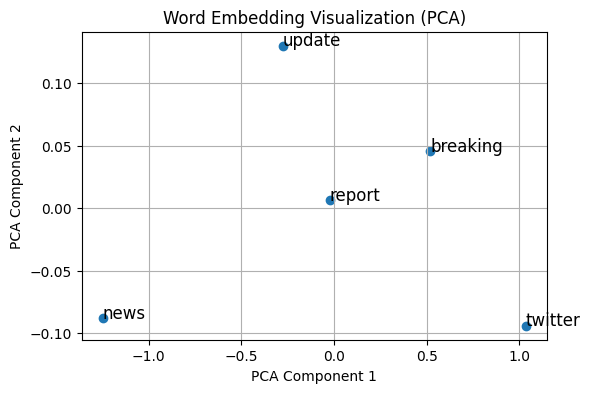

<ipython-input-59-9c16c5d8e0a3>:61: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_path, word2vec_output_file)


Most similar words to 'news' using GloVe: [('press', 0.7792888283729553), ('newspaper', 0.7733882665634155), ('media', 0.771870493888855), ('interview', 0.7700864672660828), ('reported', 0.752292275428772)]


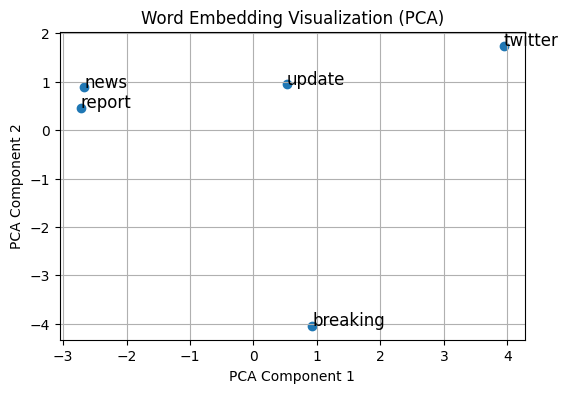

In [59]:
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=2, workers=4)
word2vec_model.save("word2vec.model")

# Check most similar words
print("Most similar words to 'news':", word2vec_model.wv.most_similar('news', topn=5))

# Visualize Word2Vec embeddings
def plot_word_vectors(model, words, is_word2vec=True):
    """
    Plots word embeddings using PCA.

    Parameters:
    - model: Word2Vec or GloVe model (KeyedVectors)
    - words: List of words to visualize
    - is_word2vec: Boolean flag to differentiate between Word2Vec and GloVe models
    """
    # Select the correct vocabulary reference
    vocab = model.wv.key_to_index if is_word2vec else model.key_to_index

    # Extract word vectors only for words present in the model's vocabulary
    word_vectors = np.array([model.wv[word] if is_word2vec else model[word] for word in words if word in vocab])
    words_found = [word for word in words if word in vocab]

    if word_vectors.size == 0:
        print("No words found in the model vocabulary.")
        return

    # Perform PCA for dimensionality reduction
    pca = PCA(n_components=2)
    reduced_vectors = pca.fit_transform(word_vectors)

    # Plot the word vectors
    plt.figure(figsize=(6, 4))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], marker='o')

    for i, word in enumerate(words_found):
        plt.annotate(word, xy=(reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=12)

    plt.title("Word Embedding Visualization (PCA)")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.grid()
    plt.show()

words_to_visualize = ['news', 'twitter', 'breaking', 'update', 'report']
plot_word_vectors(word2vec_model, words_to_visualize)

# Load GloVe vectors (requires pre-trained GloVe file)
glove_path = 'glove.6B.100d.txt'  # Update path if necessary
word2vec_output_file = 'glove_word2vec.txt'

glove2word2vec(glove_path, word2vec_output_file)
glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

# Check most similar words using GloVe
print("Most similar words to 'news' using GloVe:", glove_model.most_similar('news', topn=5))

# Visualize GloVe embeddings
plot_word_vectors(glove_model, words_to_visualize, is_word2vec=False)


In [8]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [9]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define models
models = {
    "SVM": SVC(kernel='linear'),
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-" * 50)


Model: SVM
Accuracy: 0.39577836411609496
              precision    recall  f1-score   support

           0       0.56      0.34      0.42       126
           1       0.71      0.34      0.46       120
           2       0.34      0.49      0.40       204
           3       0.48      0.38      0.42       128
           4       0.30      0.37      0.33       180

    accuracy                           0.40       758
   macro avg       0.48      0.39      0.41       758
weighted avg       0.45      0.40      0.40       758

--------------------------------------------------
Model: Naive Bayes
Accuracy: 0.2994722955145119
              precision    recall  f1-score   support

           0       1.00      0.02      0.05       126
           1       0.88      0.06      0.11       120
           2       0.31      0.72      0.43       204
           3       0.67      0.03      0.06       128
           4       0.25      0.37      0.30       180

    accuracy                           0.30  

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=2e-5)

# Tokenization and Padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=50)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=50)

# Define LSTM Model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=50),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train LSTM Model
model.fit(X_train_seq, y_train, epochs=5, batch_size=32, validation_data=(X_test_seq, y_test))

# Evaluate
y_pred_lstm = model.predict(X_test_seq).argmax(axis=1)
print("LSTM Accuracy:", accuracy_score(y_test, y_pred_lstm))
print(classification_report(y_test, y_pred_lstm))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 23s 138ms/step - accuracy: 0.2799 - loss: 1.5519 - val_accuracy: 0.3391 - val_loss: 1.4707
Epoch 2/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.4222 - loss: 1.3477 - val_accuracy: 0.4354 - val_loss: 1.3543
Epoch 3/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 12s 81ms/step - accuracy: 0.6703 - loss: 0.8734 - val_accuracy: 0.4776 - val_loss: 1.3466
Epoch 4/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.8334 - loss: 0.5272 - val_accuracy: 0.4710 - val_loss: 1.5587
Epoch 5/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 17s 147ms/step - accuracy: 0.9185 - loss: 0.2917 - val_accuracy: 0.4736 - val_loss: 1.8947
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step
LSTM Accuracy: 0.4736147757255937
              precision    recall  f1-score   support

           0       0.63      0.47      0.54       126
           1       0.56      0.55      0.55       120
           2       0.41      0.45      0.43       204
           3       0.55      0.48      0.52       128
           4      

In [14]:
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
from transformers import AdamWeightDecay
from sklearn.metrics import accuracy_score, classification_report

# Load BERT Tokenizer
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize dataset
X_train_bert = bert_tokenizer(list(X_train), padding=True, truncation=True, max_length=50, return_tensors="tf")
X_test_bert = bert_tokenizer(list(X_test), padding=True, truncation=True, max_length=50, return_tensors="tf")

# Load Pre-Trained BERT Model
bert_model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(label_encoder.classes_))

# Compile BERT Model
optimizer = AdamWeightDecay(learning_rate=2e-5, weight_decay_rate=0.01)
bert_model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
    steps_per_execution=10  # Added this line to avoid optimizer errors
)

# Train BERT Model
bert_model.fit(
    {"input_ids": X_train_bert["input_ids"], "attention_mask": X_train_bert["attention_mask"]},
    y_train,
    epochs=3,
    batch_size=16,
    validation_data=(
        {"input_ids": X_test_bert["input_ids"], "attention_mask": X_test_bert["attention_mask"]},
        y_test
    )
)

# Evaluate BERT Model
y_pred_bert = bert_model.predict(
    {"input_ids": X_test_bert["input_ids"], "attention_mask": X_test_bert["attention_mask"]}
).logits.argmax(axis=1)

# Print evaluation metrics
print("BERT Accuracy:", accuracy_score(y_test, y_pred_bert))
print(classification_report(y_test, y_pred_bert))


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
190/190 [==============================] - 2158s 11s/step - loss: 1.5346 - accuracy: 0.2922 - val_loss: 1.3643 - val_accuracy: 0.4195
Epoch 2/3
190/190 [==============================] - 2027s 11s/step - loss: 1.2110 - accuracy: 0.4990 - val_loss: 1.1413 - val_accuracy: 0.5251
Epoch 3/3
24/24 [==============================] - 135s 6s/step
BERT Accuracy: 0.5382585751978892
              precision    recall  f1-score   support

           0       0.74      0.44      0.55       126
           1       0.56      0.78      0.65       120
           2       0.50      0.51      0.50       204
           3       0.63      0.70      0.66       128
           4       0.40      0.37      0.38       180

    accuracy                           0.54       758
   macro avg       0.56      0.56      0.55       758
weighted avg       0.55      0.54      0.53       758



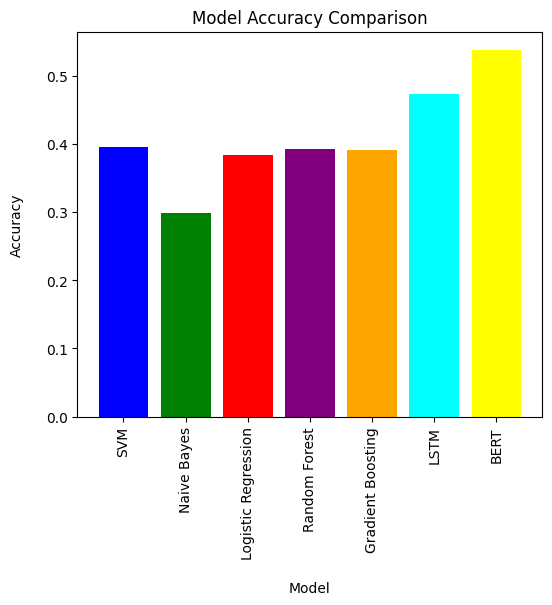

In [44]:
import matplotlib.pyplot as plt

results = {
    "SVM": accuracy_score(y_test, models["SVM"].predict(X_test_tfidf)),
    "Naive Bayes": accuracy_score(y_test, models["Naive Bayes"].predict(X_test_tfidf)),
    "Logistic Regression": accuracy_score(y_test, models["Logistic Regression"].predict(X_test_tfidf)),
    "Random Forest": accuracy_score(y_test, models["Random Forest"].predict(X_test_tfidf)),
    "Gradient Boosting": accuracy_score(y_test, models["Gradient Boosting"].predict(X_test_tfidf)),
    "LSTM": accuracy_score(y_test, y_pred_lstm),
    "BERT": accuracy_score(y_test, y_pred_bert)
}

plt.figure(figsize=(6, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'yellow'])
plt.xlabel("\nModel")
plt.ylabel("Accuracy\n")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=90)
plt.show()
